# 01. 환경 설정

In [17]:
# 라이브러리 가져오기
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import scipy
import sklearn
import os
import chardet

# matplotlib 하위 모듈
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# # 윈도우 환경에서 설치된 'Malgun Gothic' 폰트 경로 찾기
# font_path = fm.findSystemFonts(fontpaths=None, fontext='ttf')
# malgun_gothic_path = [f for f in font_path if 'malgun' in f.lower()][0]

# # matplotlib 폰트 설정
# plt.rcParams['font.size'] = 17.5
# plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.sans-serif'] = ['Malgun Gothic']

# 마이너스 폰트 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

# 옵션 설정
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.4f}'.format

# 버전 체크
# print(pd.__version__)          # 2.1.1
# print(np.__version__)          # 1.26.1
# print(sns.__version__)         # 0.13.0
# print(matplotlib.__version__)  # 3.8.0
# print(scipy.__version__)       # 1.11.3
# print(sklearn.__version__)     # 1.3.1
# print(chardet.__version__)     # 5.2.0

# 02. 데이터 불러오기

In [18]:
# 데이터 불러오기
path = './data/'

Data = pd.read_csv(path + 'encoded_data_date_6.csv', encoding='utf-8')  # A_01 부터 체크
A_01 = Data.copy()

Quality = pd.read_excel(path + 'quality.xlsx') # B_01 부터 체크
B_01 = Quality.copy()

## 02-01. 설비 데이터 전처리

In [19]:
# 결측치 및 데이터 타입 체크
A_01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2939722 entries, 0 to 2939721
Data columns (total 25 columns):
 #   Column     Dtype  
---  ------     -----  
 0   AN         int64  
 1   DZ1_OP     float64
 2   DZ2_OP     float64
 3   DZ1_TEMP   float64
 4   DZ2_TEMP   float64
 5   CLEAN      float64
 6   HDZ1_OP    float64
 7   HDZ2_OP    float64
 8   HDZ3_OP    float64
 9   HDZ4_OP    float64
 10  HDZ_CP     float64
 11  HDZ_CPM    float64
 12  HDZ1_TEMP  float64
 13  HDZ2_TEMP  float64
 14  HDZ3_TEMP  float64
 15  HDZ4_TEMP  float64
 16  SCZ1_TEMP  float64
 17  SCZ2_TEMP  float64
 18  STZ1_TEMP  float64
 19  Year       int64  
 20  Month      int64  
 21  Day        int64  
 22  Hour       int64  
 23  Minute     int64  
 24  Second     int64  
dtypes: float64(18), int64(7)
memory usage: 560.7 MB


In [20]:
# 데이터의 구조를 보니 차후 배정번호 별, 분 단위 별로 묶으면 될 것 같음
A_01.head(1)

,AN,DZ1_OP,DZ2_OP,DZ1_TEMP,DZ2_TEMP,CLEAN,HDZ1_OP,HDZ2_OP,HDZ3_OP,HDZ4_OP,HDZ_CP,HDZ_CPM,HDZ1_TEMP,HDZ2_TEMP,HDZ3_TEMP,HDZ4_TEMP,SCZ1_TEMP,SCZ2_TEMP,STZ1_TEMP,Year,Month,Day,Hour,Minute,Second
0,102410,73.5091,25.0478,99.5431,99.6467,69.2832,77.2519,59.7862,51.2801,70.3897,0.4495,0.0000,859.0911,859.9875,859.9252,859.9679,285.5743,281.7379,328.8738,2022,1,3,11,22,7


In [21]:
# 데이터 원본 카피
A_02 = A_01.copy()

# 데이터 컬럼에 이상치 값 0으로 배정
A_02['DZ2_OP_Outlier'] = 0

# IQR 계산
thirdq, firstq = A_02['DZ2_OP'].quantile(0.75), A_02['DZ2_OP'].quantile(0.25)
interquartilerange = 1.5 * (thirdq - firstq)
outlierhigh, outlierlow = interquartilerange + thirdq, firstq - interquartilerange

# 이상치 탐지
A_02['DZ2_OP_Outlier'] = ((A_02['DZ2_OP'] > outlierhigh) | (A_02['DZ2_OP'] < outlierlow)).astype(int)

# 결과 출력
print(A_02.head())

       AN  DZ1_OP  DZ2_OP  DZ1_TEMP  DZ2_TEMP   CLEAN  HDZ1_OP  HDZ2_OP  \
0  102410 73.5091 25.0478   99.5431   99.6467 69.2832  77.2519  59.7862   
1  102410 74.5538 23.8251   99.5583   99.6800 69.1850  79.3529  61.6286   
2  102410 75.6776 32.1592   98.8533   99.1460 68.4386  78.1099  61.5414   
3  102410 75.8656 30.8312   98.7918   99.1767 68.4999  77.5072  60.6663   
4  102410 73.6468 29.5274   98.7918   99.2075 68.4386  76.0262  61.1634   

   HDZ3_OP  HDZ4_OP  HDZ_CP  HDZ_CPM  HDZ1_TEMP  HDZ2_TEMP  HDZ3_TEMP  \
0  51.2801  70.3897  0.4495   0.0000   859.0911   859.9875   859.9252   
1  51.9731  71.3202  0.4495   0.0000   859.0312   859.5825   859.7321   
2  52.0196  72.0384  0.4503   0.0000   860.3380   859.7800   859.9810   
3  52.6942  73.4815  0.4502   0.0000   860.3380   859.8420   859.9500   
4  51.6915  71.6093  0.4502   0.0000   860.3510   859.7910   859.9910   

   HDZ4_TEMP  SCZ1_TEMP  SCZ2_TEMP  STZ1_TEMP  Year  Month  Day  Hour  Minute  \
0   859.9679   285.5743   281

## 02-02. 설비 데이터 그룹화

In [23]:
# 시간별, 분단위별로 그룹화
A_03 = A_02.copy()
A_03.drop(['Minute','Second'], axis=1, inplace=True)

A_03 = A_03.groupby(['AN', 'Year', 'Month', 'Day', 'Hour']).agg({
    'DZ1_OP': 'mean',
    'DZ2_OP': 'mean',
    'DZ1_TEMP': 'mean',
    'DZ2_TEMP': 'mean',
    'CLEAN': 'mean',
    'HDZ1_OP': 'mean',
    'HDZ2_OP': 'mean',
    'HDZ3_OP': 'mean',
    'HDZ4_OP': 'mean',
    'HDZ_CP': 'mean',
    'HDZ_CPM': 'mean',
    'HDZ1_TEMP': 'mean',
    'HDZ2_TEMP': 'mean',
    'HDZ3_TEMP': 'mean',
    'HDZ4_TEMP': 'mean',
    'SCZ1_TEMP': 'mean',
    'SCZ2_TEMP': 'mean',
    'STZ1_TEMP': 'mean',
    'DZ2_OP_Outlier': 'sum'
}).reset_index()

A_03.describe()

,AN,Year,Month,Day,Hour,DZ1_OP,DZ2_OP,DZ1_TEMP,DZ2_TEMP,CLEAN,HDZ1_OP,HDZ2_OP,HDZ3_OP,HDZ4_OP,HDZ_CP,HDZ_CPM,HDZ1_TEMP,HDZ2_TEMP,HDZ3_TEMP,HDZ4_TEMP,SCZ1_TEMP,SCZ2_TEMP,STZ1_TEMP,DZ2_OP_Outlier
count,970.0000,970.0000,970.0000,970.0000,970.0000,970.0000,970.0000,970.0000,970.0000,970.0000,970.0000,970.0000,970.0000,970.0000,970.0000,970.0000,970.0000,970.0000,970.0000,970.0000,970.0000,970.0000,970.0000,970.0000
mean,128425.0804,2022.0000,4.1474,15.4041,11.0557,69.7614,20.5052,99.9995,99.9997,67.6957,75.5079,54.8416,53.8764,71.0749,0.4483,0.0000,859.2367,860.0026,860.0021,860.0038,283.9327,279.9594,331.8041,236.4990
std,12607.5080,0.0000,1.7903,8.5420,7.1986,2.8569,4.5777,0.1610,0.2350,1.6013,10.8472,3.6391,1.9790,1.6985,0.0200,0.0000,1.3197,0.1376,0.1130,0.1917,3.4683,2.2891,0.7838,663.3386
min,102410.0000,2022.0000,1.0000,1.0000,0.0000,55.2068,0.6265,98.3104,98.3549,61.9056,3.4079,39.9069,34.4669,48.0232,0.1069,0.0000,853.1818,858.4693,859.0511,859.0359,270.7227,270.8810,328.3078,0.0000
25%,119448.0000,2022.0000,3.0000,9.0000,5.0000,68.9370,19.1563,99.9769,99.9715,66.5809,71.8718,54.1704,53.0735,70.0989,0.4500,0.0000,858.6565,859.9581,859.9717,859.9757,282.0470,278.6496,331.9014,0.0000
50%,129889.0000,2022.0000,4.0000,15.0000,11.0000,70.1733,21.2555,100.0006,100.0086,67.7241,78.3130,55.7571,54.0250,71.0604,0.4501,0.0000,859.3068,860.0027,860.0016,860.0003,284.1221,279.8657,332.0208,0.0000
75%,138938.0000,2022.0000,6.0000,22.0000,18.0000,71.2602,23.0305,100.0300,100.0576,68.9650,82.7064,56.9620,54.8868,72.1276,0.4503,0.0000,859.8775,860.0453,860.0303,860.0264,285.9243,281.2436,332.1248,106.0000
max,148069.0000,2022.0000,7.0000,31.0000,23.0000,75.8619,33.5492,101.6565,101.1385,71.0017,97.6580,63.0725,58.7628,77.1732,0.4843,0.0000,867.0769,861.3677,862.2057,865.3627,297.7669,289.9198,332.4040,3541.0000


## 02-03. 설비 그룹화 데이터 Info

In [24]:
A_03.head()

,AN,Year,Month,Day,Hour,DZ1_OP,DZ2_OP,DZ1_TEMP,DZ2_TEMP,CLEAN,HDZ1_OP,HDZ2_OP,HDZ3_OP,HDZ4_OP,HDZ_CP,HDZ_CPM,HDZ1_TEMP,HDZ2_TEMP,HDZ3_TEMP,HDZ4_TEMP,SCZ1_TEMP,SCZ2_TEMP,STZ1_TEMP,DZ2_OP_Outlier
0,102410,2022,1,3,11,73.2501,24.8670,99.8905,100.1810,69.6934,62.2119,59.0551,50.5300,70.5911,0.4494,0.0000,861.6627,860.0917,860.0969,860.0118,281.6291,280.9140,328.9397,500
1,102410,2022,1,3,12,72.4101,20.4676,99.9949,99.9767,69.6177,83.6938,59.5025,50.4305,70.0996,0.4502,0.0000,857.8845,859.9457,859.9932,859.9968,285.7964,277.9390,329.0254,0
2,102410,2022,1,3,13,70.5052,18.3643,99.9043,100.0814,69.4428,77.1296,59.3487,51.4435,70.0986,0.4526,0.0000,859.9523,860.0476,859.9236,860.0392,276.8509,283.9351,329.1021,208
3,102585,2022,1,3,22,72.8980,21.4173,99.9567,100.4232,70.8956,80.5230,60.4992,51.5050,71.4662,0.4499,0.0000,858.6884,859.9695,859.9794,859.9384,288.4501,283.4563,329.0104,0
4,102585,2022,1,3,23,72.5923,18.1548,99.9917,100.0415,69.2022,76.0577,58.9792,51.7318,70.2058,0.4499,0.0000,859.7761,860.0545,860.0363,860.0253,282.4817,278.3610,329.0115,0


In [25]:
A_03.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 970 entries, 0 to 969
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   AN              970 non-null    int64  
 1   Year            970 non-null    int64  
 2   Month           970 non-null    int64  
 3   Day             970 non-null    int64  
 4   Hour            970 non-null    int64  
 5   DZ1_OP          970 non-null    float64
 6   DZ2_OP          970 non-null    float64
 7   DZ1_TEMP        970 non-null    float64
 8   DZ2_TEMP        970 non-null    float64
 9   CLEAN           970 non-null    float64
 10  HDZ1_OP         970 non-null    float64
 11  HDZ2_OP         970 non-null    float64
 12  HDZ3_OP         970 non-null    float64
 13  HDZ4_OP         970 non-null    float64
 14  HDZ_CP          970 non-null    float64
 15  HDZ_CPM         970 non-null    float64
 16  HDZ1_TEMP       970 non-null    float64
 17  HDZ2_TEMP       970 non-null    flo

In [26]:
A_03['DZ2_OP_Outlier'].value_counts()

0       509
1        59
3        21
2        20
4        12
       ... 
317       1
323       1
328       1
330       1
1013      1
Name: DZ2_OP_Outlier, Length: 263, dtype: int64

In [30]:
A_03['DZ2_OP_Signal'] = np.where(A_03['DZ2_OP_Outlier'] <= 1199, 0, 1)
A_03['DZ2_OP_Signal'].value_counts()

0    929
1     41
Name: DZ2_OP_Signal, dtype: int64

In [31]:
A_03.drop('DZ2_OP_Outlier', inplace=True, axis=1)

In [32]:
A_03.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 970 entries, 0 to 969
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AN             970 non-null    int64  
 1   Year           970 non-null    int64  
 2   Month          970 non-null    int64  
 3   Day            970 non-null    int64  
 4   Hour           970 non-null    int64  
 5   DZ1_OP         970 non-null    float64
 6   DZ2_OP         970 non-null    float64
 7   DZ1_TEMP       970 non-null    float64
 8   DZ2_TEMP       970 non-null    float64
 9   CLEAN          970 non-null    float64
 10  HDZ1_OP        970 non-null    float64
 11  HDZ2_OP        970 non-null    float64
 12  HDZ3_OP        970 non-null    float64
 13  HDZ4_OP        970 non-null    float64
 14  HDZ_CP         970 non-null    float64
 15  HDZ_CPM        970 non-null    float64
 16  HDZ1_TEMP      970 non-null    float64
 17  HDZ2_TEMP      970 non-null    float64
 18  HDZ3_TEMP 

In [33]:
A_03.to_csv('Deep_learning_v02.csv')

## 02-04. 품질 데이터 불러오기

In [28]:
# 퀄리티 데이터에서 불필요한 컬럼 삭제하기
B_02 = B_01.copy()
B_02.drop(['작업일', '공정명', '설비명'], axis=1, inplace=True)
B_02.head(1)

,배정번호,양품수량,불량수량,총수량
0,102410,15160,3,15163


In [29]:
# 퀄리티 데이터 컬럼명 변경
Q_column_list = {
    '배정번호': 'AN',
    '양품수량': 'GQ',
    '불량수량': 'BQ',
    '총수량': 'TQ'
}

B_02.rename(columns=Q_column_list, inplace=True)
B_02

,AN,GQ,BQ,TQ
0,102410,15160,3,15163
1,102585,29892,10,29902
2,102930,59616,30,59646
3,103142,74730,13,74743
4,103675,14979,2,14981
...,...,...,...,...
131,147292,43765,12,43777
132,147546,59957,16,59973
133,147982,40981,12,40993
134,147996,30239,9,30248


# 03. 설비 및 품질 데이터 Merge

## 03-01. 데이터 결합

In [30]:
# Left join으로 퀄리티, 공정 데이터를 결합
Mergy_01 = pd.merge(A_03, B_02, on='AN', how='left')
Mergy_01.head(5)

,AN,Year,Month,Day,Hour,Minute,DZ1_OP,DZ2_OP,DZ1_TEMP,DZ2_TEMP,CLEAN,HDZ1_OP,HDZ2_OP,HDZ3_OP,HDZ4_OP,HDZ_CP,HDZ_CPM,HDZ1_TEMP,HDZ2_TEMP,HDZ3_TEMP,HDZ4_TEMP,SCZ1_TEMP,SCZ2_TEMP,STZ1_TEMP,DZ2_OP_Outlier,GQ,BQ,TQ
0,102410,2022,1,3,11,22,75.9119,30.6680,98.8229,99.1666,68.5039,74.9467,60.5874,51.5267,71.2890,0.4491,0.0000,860.2858,859.8186,860.0143,859.7616,294.5776,273.2307,328.7681,36,15160,3,15163
1,102410,2022,1,3,11,23,76.6043,31.7213,98.8176,99.0784,68.5287,66.1980,60.4544,51.5384,71.3132,0.4504,0.0000,860.6172,859.8132,860.0583,859.7549,295.3441,273.8712,328.8194,55,15160,3,15163
2,102410,2022,1,3,11,24,76.2671,32.2290,98.9301,99.0842,68.6288,70.9439,60.3524,51.5901,71.7792,0.4498,0.0000,860.6924,859.8500,860.0675,859.7358,295.4813,274.9540,328.7330,57,15160,3,15163
3,102410,2022,1,3,11,25,75.8917,32.0185,99.0983,99.1409,68.7164,88.0877,59.7708,51.0080,71.1196,0.4507,0.0000,859.9129,859.9436,860.1280,859.8006,295.3642,276.1310,328.7699,55,15160,3,15163
4,102410,2022,1,3,11,26,76.0652,32.7423,99.2799,99.2136,68.8008,94.4225,58.8749,50.1784,71.1587,0.4492,0.0000,859.1048,860.1301,860.2602,859.8901,295.0260,277.3738,328.8031,59,15160,3,15163


## 03-02. 결합 데이터 Info

In [32]:
Mergy_01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50168 entries, 0 to 50167
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   AN              50168 non-null  int64  
 1   Year            50168 non-null  int64  
 2   Month           50168 non-null  int64  
 3   Day             50168 non-null  int64  
 4   Hour            50168 non-null  int64  
 5   Minute          50168 non-null  int64  
 6   DZ1_OP          50168 non-null  float64
 7   DZ2_OP          50168 non-null  float64
 8   DZ1_TEMP        50168 non-null  float64
 9   DZ2_TEMP        50168 non-null  float64
 10  CLEAN           50168 non-null  float64
 11  HDZ1_OP         50168 non-null  float64
 12  HDZ2_OP         50168 non-null  float64
 13  HDZ3_OP         50168 non-null  float64
 14  HDZ4_OP         50168 non-null  float64
 15  HDZ_CP          50168 non-null  float64
 16  HDZ_CPM         50168 non-null  float64
 17  HDZ1_TEMP       50168 non-null 

In [33]:
Mergy_01.isna().sum()

AN                0
Year              0
Month             0
Day               0
Hour              0
Minute            0
DZ1_OP            0
DZ2_OP            0
DZ1_TEMP          0
DZ2_TEMP          0
CLEAN             0
HDZ1_OP           0
HDZ2_OP           0
HDZ3_OP           0
HDZ4_OP           0
HDZ_CP            0
HDZ_CPM           0
HDZ1_TEMP         0
HDZ2_TEMP         0
HDZ3_TEMP         0
HDZ4_TEMP         0
SCZ1_TEMP         0
SCZ2_TEMP         0
STZ1_TEMP         0
DZ2_OP_Outlier    0
GQ                0
BQ                0
TQ                0
dtype: int64

## 03-03. 불량률 파생변수 생성

In [36]:
# 종속변수를 만들기 위해 불량 수량 / 총 생산량 * 100을 통해 불량률 컬럼 생성
Mergy_01['BQ Rate'] = round(Mergy_01['BQ'] / Mergy_01['TQ'] * 100, 3)
Mergy_01.head(5)

,AN,Year,Month,Day,Hour,Minute,DZ1_OP,DZ2_OP,DZ1_TEMP,DZ2_TEMP,CLEAN,HDZ1_OP,HDZ2_OP,HDZ3_OP,HDZ4_OP,HDZ_CP,HDZ_CPM,HDZ1_TEMP,HDZ2_TEMP,HDZ3_TEMP,HDZ4_TEMP,SCZ1_TEMP,SCZ2_TEMP,STZ1_TEMP,DZ2_OP_Outlier,GQ,BQ,TQ,BQ Rate
0,102410,2022,1,3,11,22,75.9119,30.6680,98.8229,99.1666,68.5039,74.9467,60.5874,51.5267,71.2890,0.4491,0.0000,860.2858,859.8186,860.0143,859.7616,294.5776,273.2307,328.7681,36,15160,3,15163,0.0200
1,102410,2022,1,3,11,23,76.6043,31.7213,98.8176,99.0784,68.5287,66.1980,60.4544,51.5384,71.3132,0.4504,0.0000,860.6172,859.8132,860.0583,859.7549,295.3441,273.8712,328.8194,55,15160,3,15163,0.0200
2,102410,2022,1,3,11,24,76.2671,32.2290,98.9301,99.0842,68.6288,70.9439,60.3524,51.5901,71.7792,0.4498,0.0000,860.6924,859.8500,860.0675,859.7358,295.4813,274.9540,328.7330,57,15160,3,15163,0.0200
3,102410,2022,1,3,11,25,75.8917,32.0185,99.0983,99.1409,68.7164,88.0877,59.7708,51.0080,71.1196,0.4507,0.0000,859.9129,859.9436,860.1280,859.8006,295.3642,276.1310,328.7699,55,15160,3,15163,0.0200
4,102410,2022,1,3,11,26,76.0652,32.7423,99.2799,99.2136,68.8008,94.4225,58.8749,50.1784,71.1587,0.4492,0.0000,859.1048,860.1301,860.2602,859.8901,295.0260,277.3738,328.8031,59,15160,3,15163,0.0200


## 03-04. 불량률과 이상치 상관관계 분석

<Figure size 640x480 with 0 Axes>

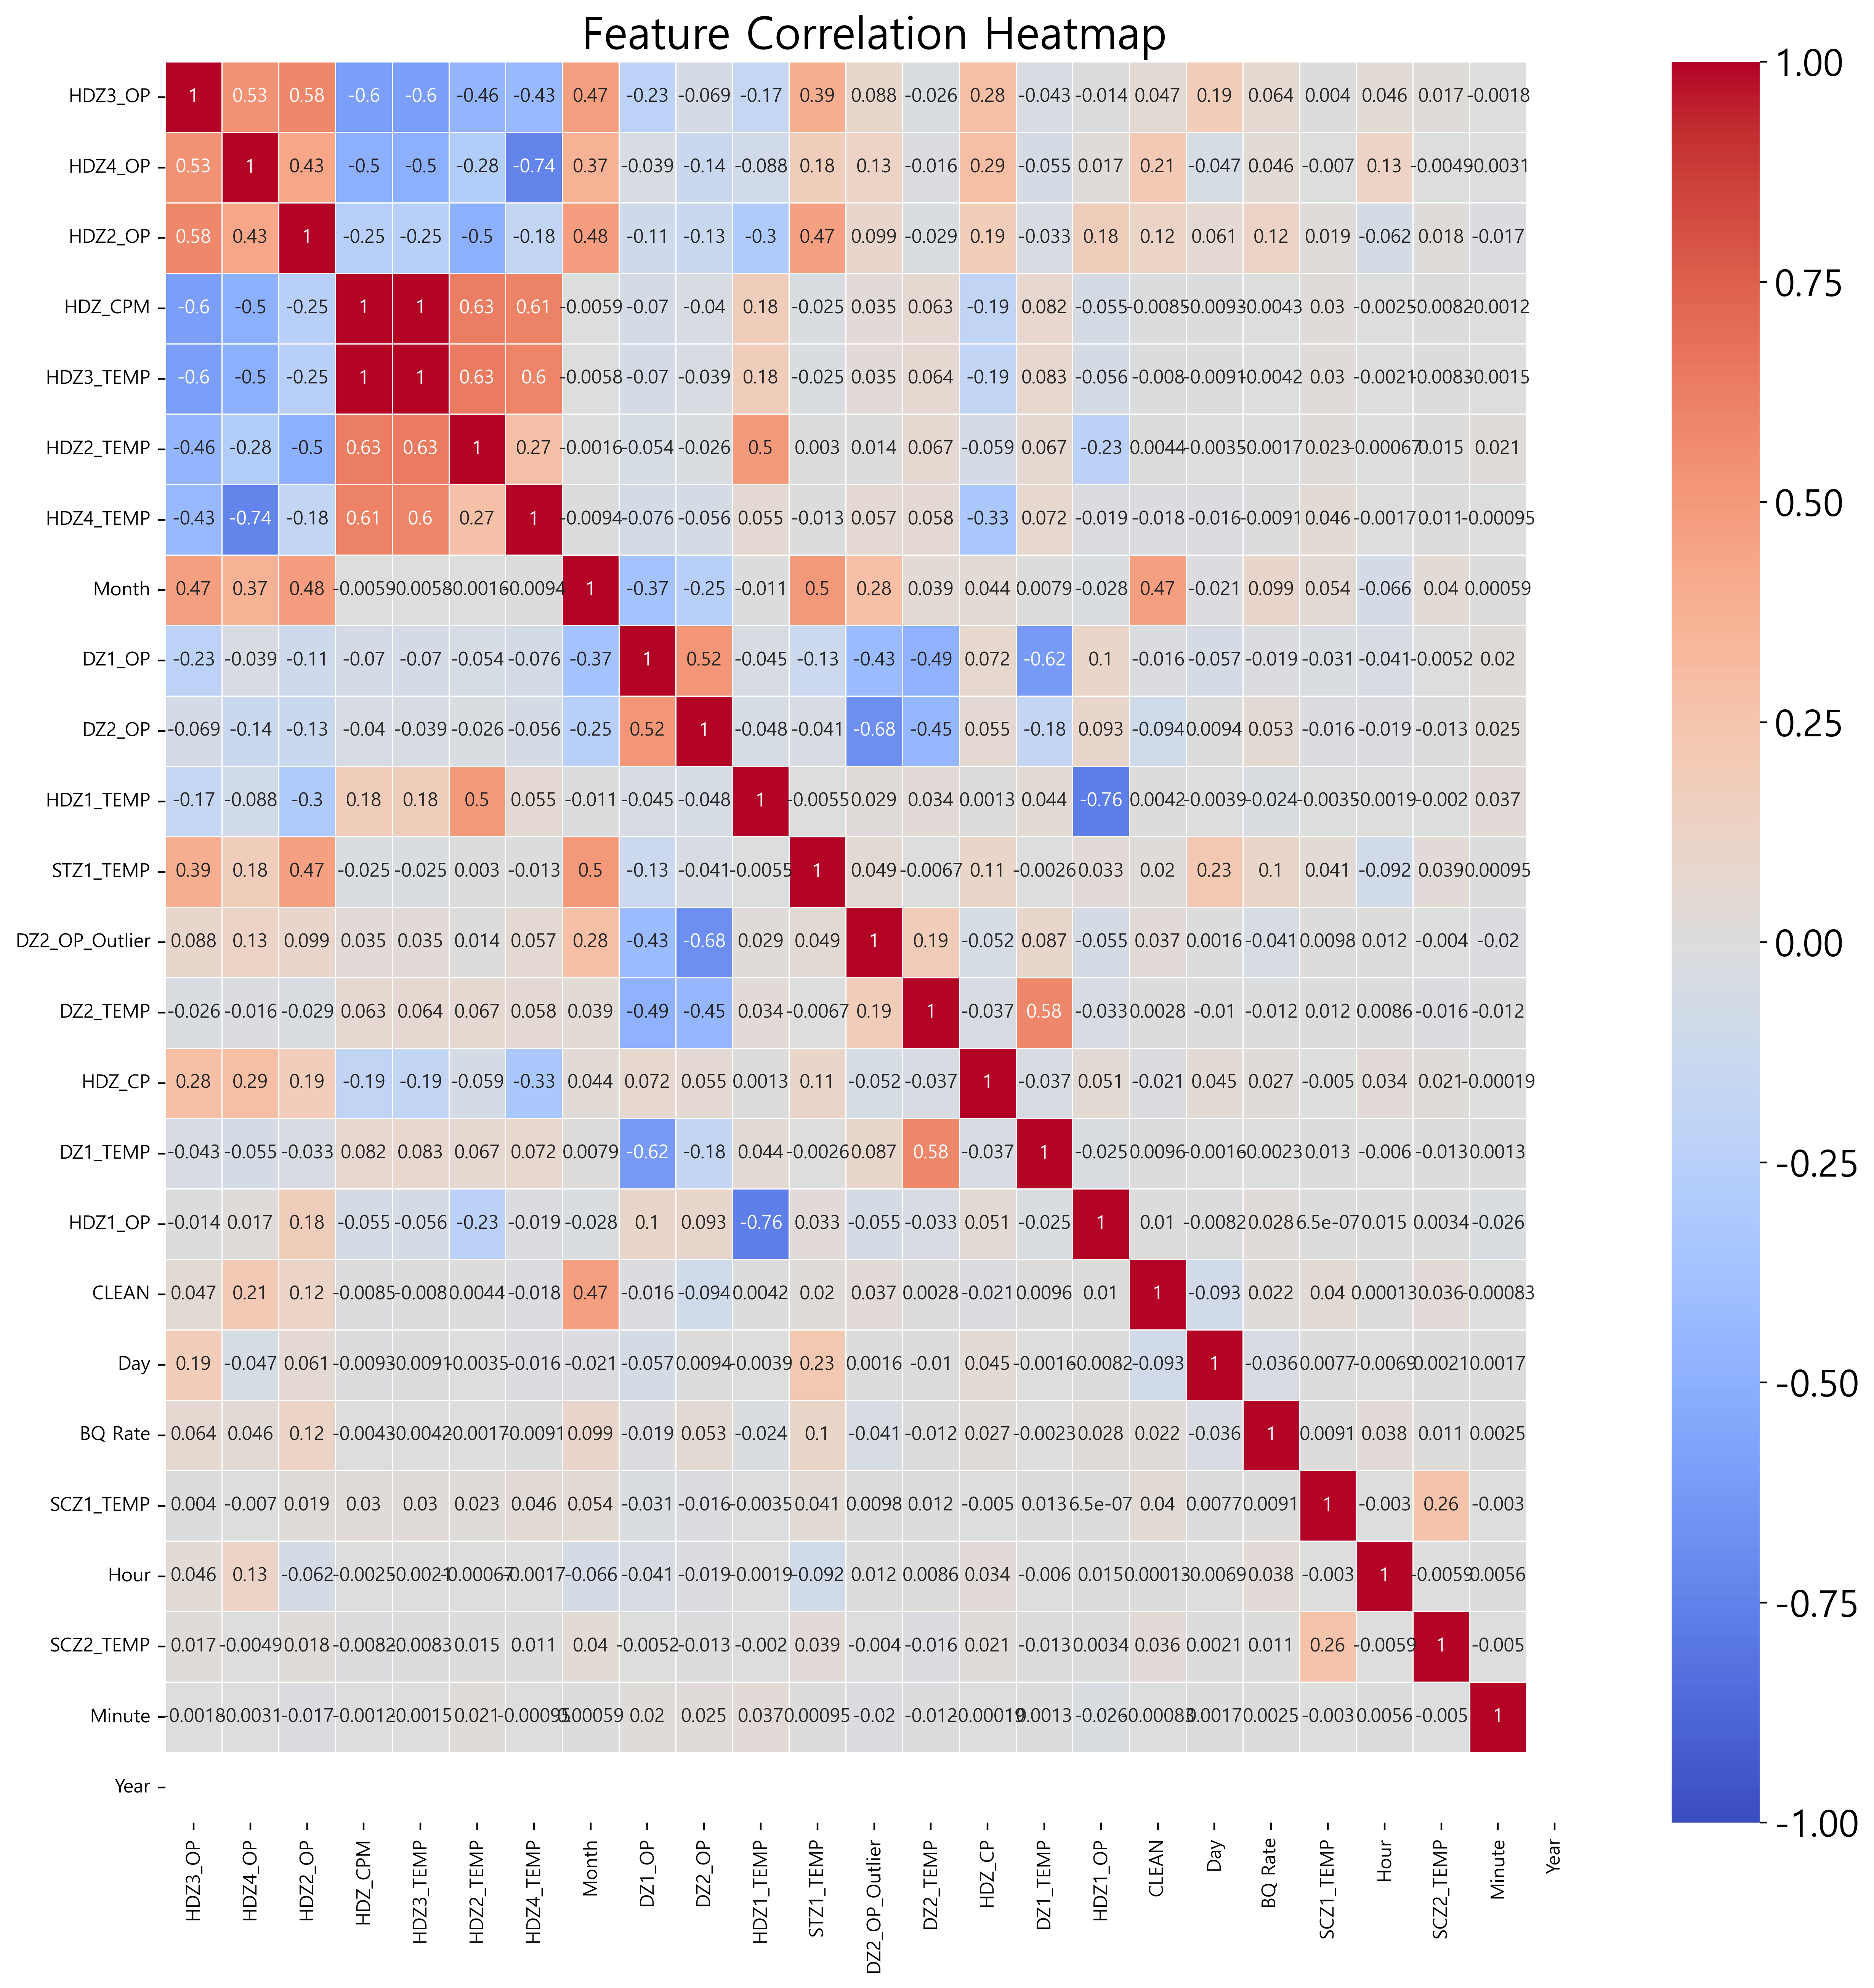

In [38]:
def plot_correlation_heatmap(df):
    # 데이터프레임의 상관계수 행렬을 계산
    corr = df.corr()

    # 상관계수 행렬의 절대값을 기준으로 내림차순 정렬
    cols = corr.abs().sum().sort_values(ascending=False).index

    # 정렬된 순서대로 상관계수 행렬 재배열
    sorted_corr = corr.loc[cols, cols]

    # 히트맵 그리기
    plt.figure(figsize=(15, 15), dpi=400)
    sns.heatmap(sorted_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5, annot_kws={'size': 9})
    
    # x, y 축의 텍스트 크기 조절
    plt.xticks(fontsize=9)
    plt.yticks(fontsize=9)
    plt.title("Feature Correlation Heatmap")
    plt.show()

plt.tight_layout()
plot_correlation_heatmap(Mergy_01.drop(['AN', 'GQ', 'BQ', 'TQ'], axis=1))